In [1]:
import pandas as pd
import os
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import seaborn as sns

/Users/leo/.pyenv/versions/3.8.7/envs/covid/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
FOLDER = "results/"

In [3]:
no_interaction = pd.read_csv(f"results/no_interaction.csv", index_col=0)
no_interaction = no_interaction[
    ["States", "train_error_custom", "test_error_custom", "average_variance_custom"]
].set_index("States")

In [4]:
no_interaction

,train_error_custom,test_error_custom,average_variance_custom
States,,,
Alaska,1.713760,4.738674,5.564479
Alabama,0.612509,1.037147,5.463056
Arkansas,0.364159,0.444898,3.675457
Arizona,1.082644,1.162652,4.027764
California,0.572977,1.682737,5.721593
Colorado,0.551891,0.321300,4.364733
Connecticut,0.437749,0.143692,4.237082
District of Columbia,0.512980,0.350821,3.971581
Delaware,0.774085,1.478820,3.931093


In [5]:
STATES = [
    'Alaska',
    'Alabama',
    'Arkansas',
    'Arizona',
    'California',
    'Colorado',
    'Connecticut',
    'District of Columbia',
    'Delaware',
    'Florida',
    'Georgia',
    'Hawaii',
    'Iowa',
    'Idaho',
    'Illinois',
    'Indiana',
    'Kansas'
]

In [6]:
changes = defaultdict(dict)

def plot_change_for_state(state):
    results = {}
    for c in (c for c in combinations(STATES, 2) if c[0] == state or c[1] == state):
        other = c[1] if c[1] != state else c[0]
        df = pd.read_csv(f"results/{c[0]}_{c[1]}_interaction.csv", index_col=0)
        df = df[df["States"] == state]
        df = df[["train_error_custom", "test_error_custom", "average_variance_custom"]]
        results[other] = list(df.to_dict('index').values())[0]

    assert len(results) == 16, state
        
    results = pd.DataFrame(results).T

    fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
    fig.suptitle(state, fontsize=16)

    for i, att in enumerate(["train_error_custom", "test_error_custom", "average_variance_custom"]):
        change = np.array((no_interaction.loc[state].to_dict()[att] - results[att]) / no_interaction.loc[state].to_dict()[att])
        
        changes[att][state] = dict(zip(results.index, change))
        changes[att][state][state] = 0.0
        
        axs[i].axhline(y = 0, lw=0.5)
        axs[i].bar(results.index, np.ma.masked_less_equal(change, 0), color="r")
        axs[i].bar(results.index, np.ma.masked_where(change>0, change), color="g")
        axs[i].set_xticklabels(labels=results.index,rotation=90);
        axs[i].set_ylim([-np.max(np.abs(change))*1.1, np.max(np.abs(change))*1.1])
        axs[i].set_title(att)

/Users/leo/.pyenv/versions/3.8.7/envs/covid/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:262: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
<ipython-input-6-ef098535fd5f>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=results.index,rotation=90);


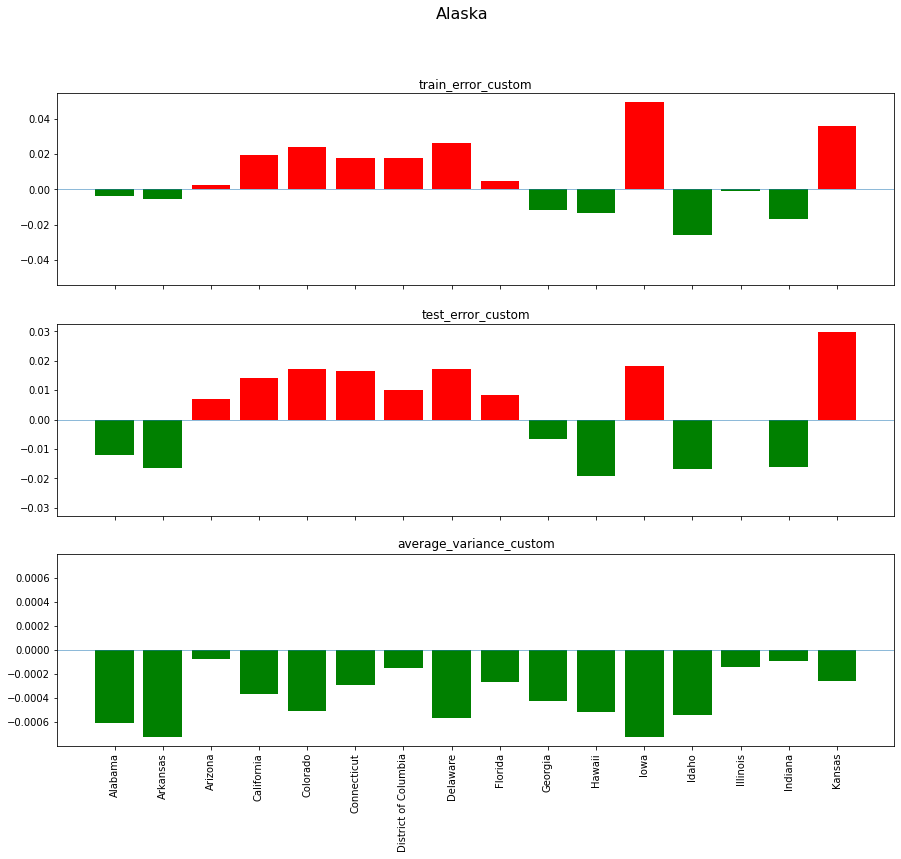

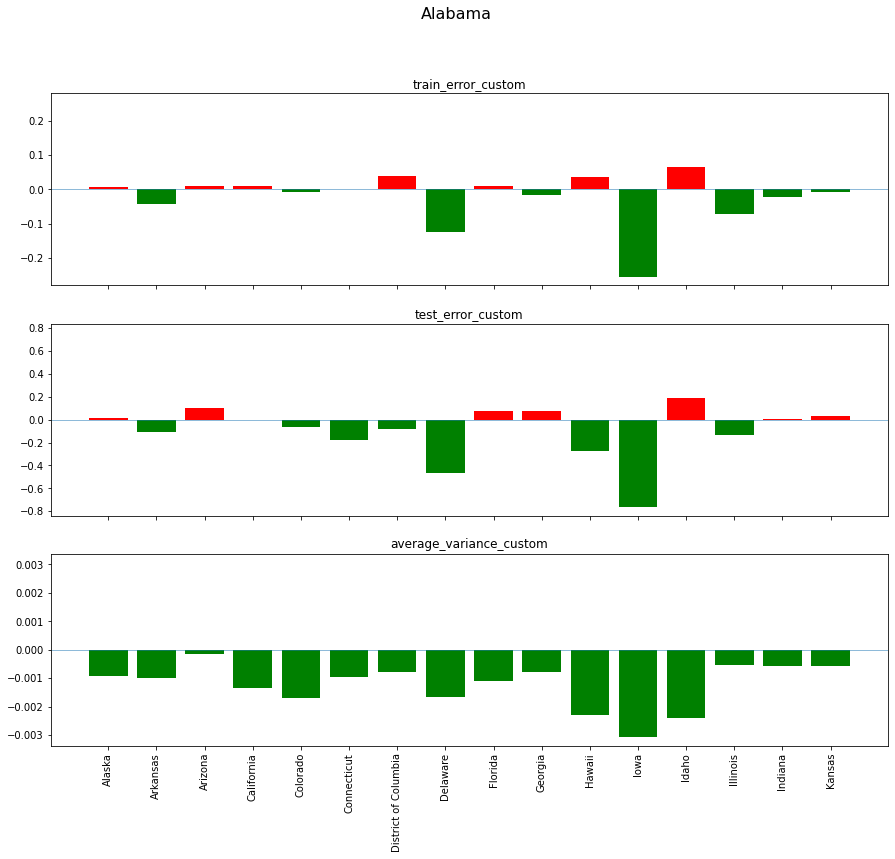

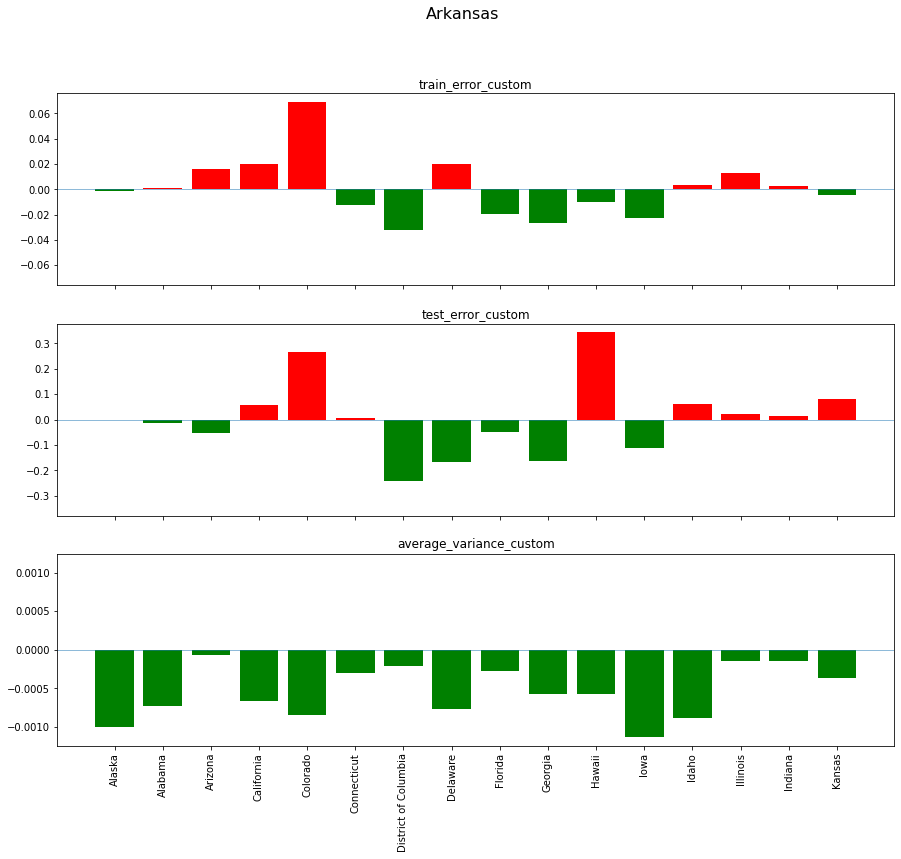

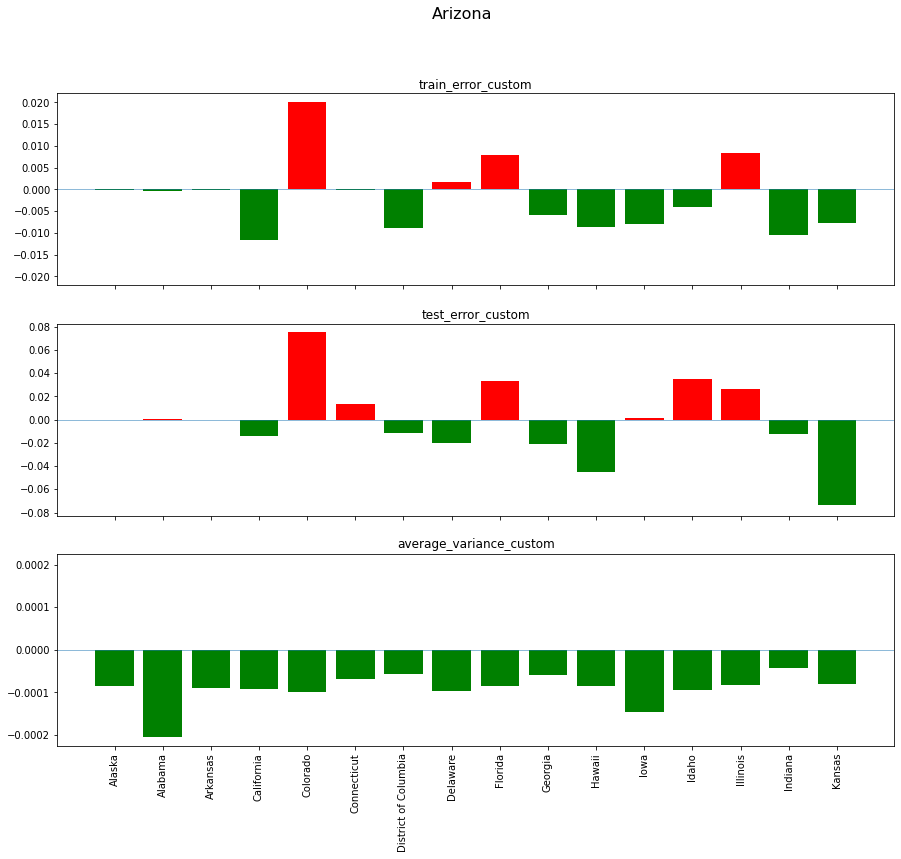

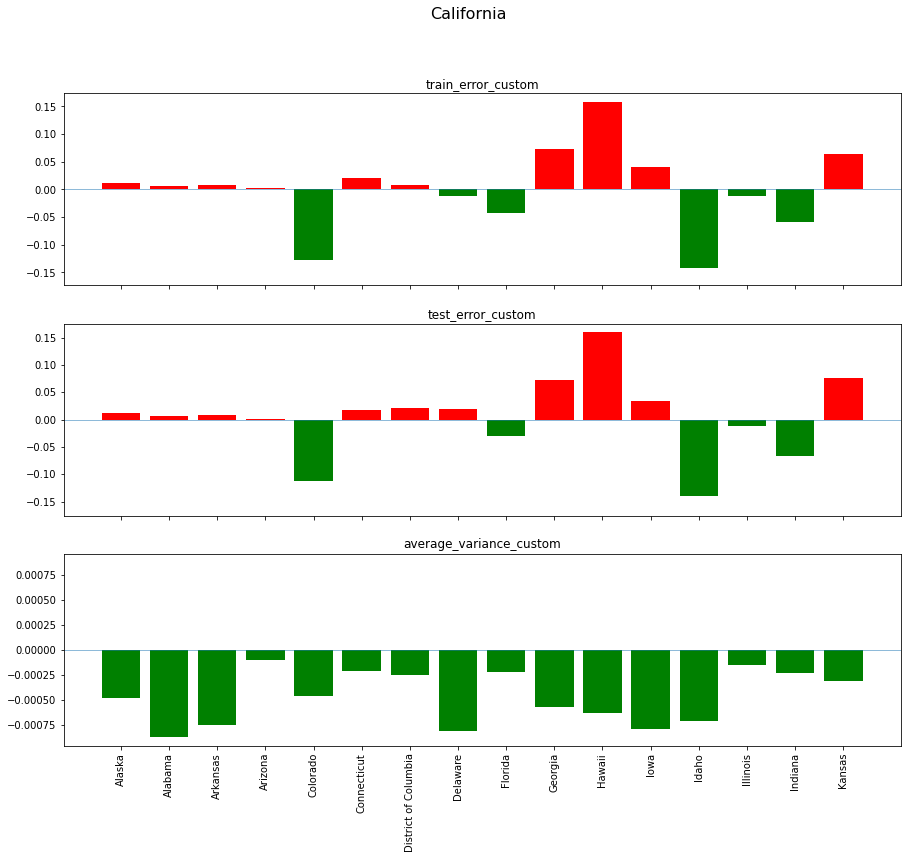

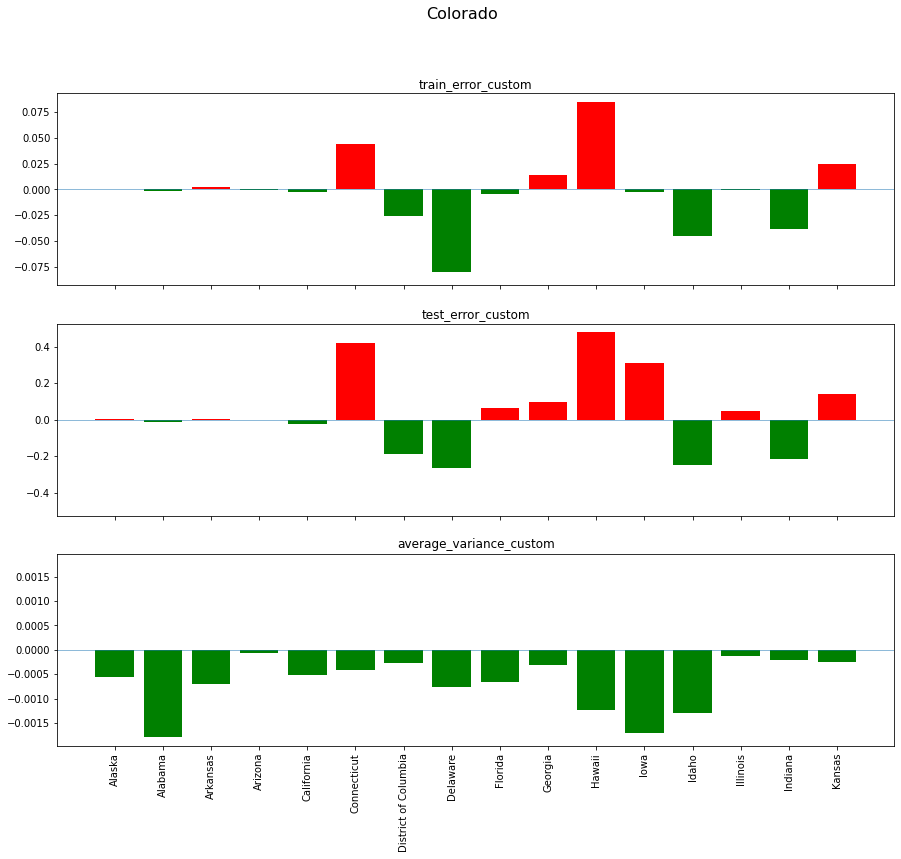

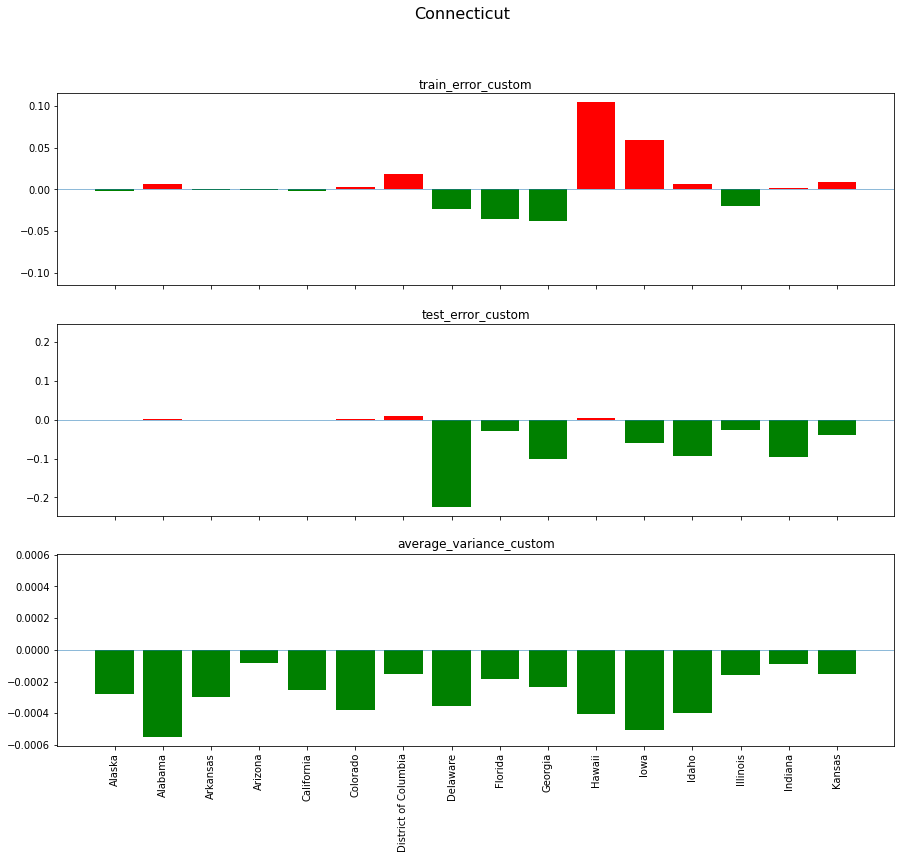

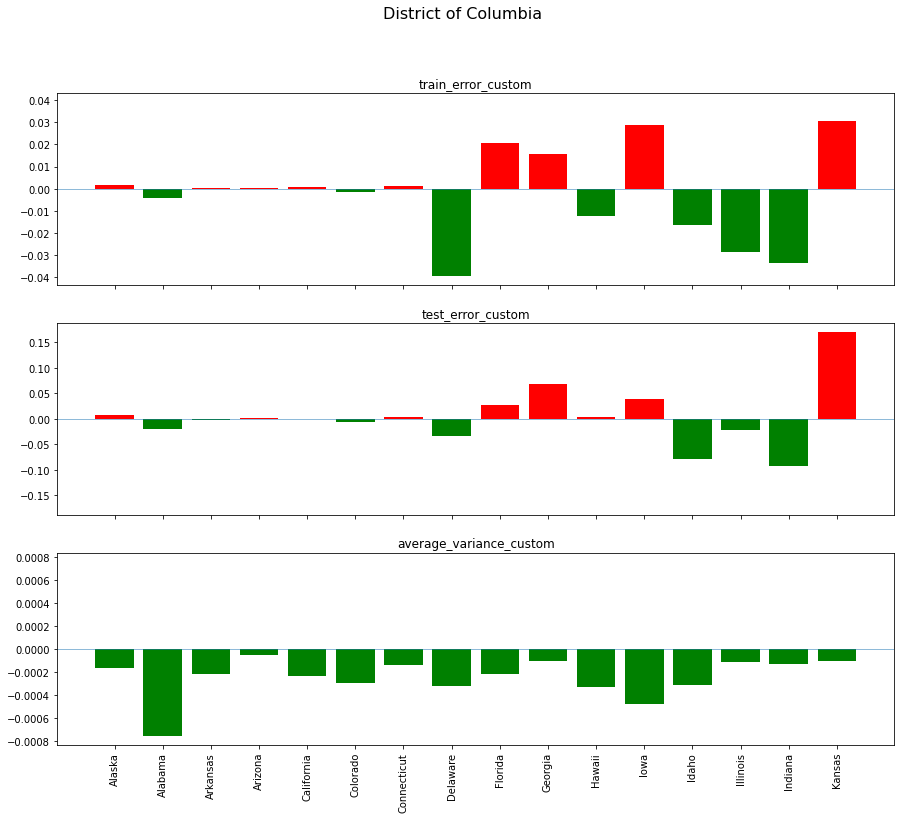

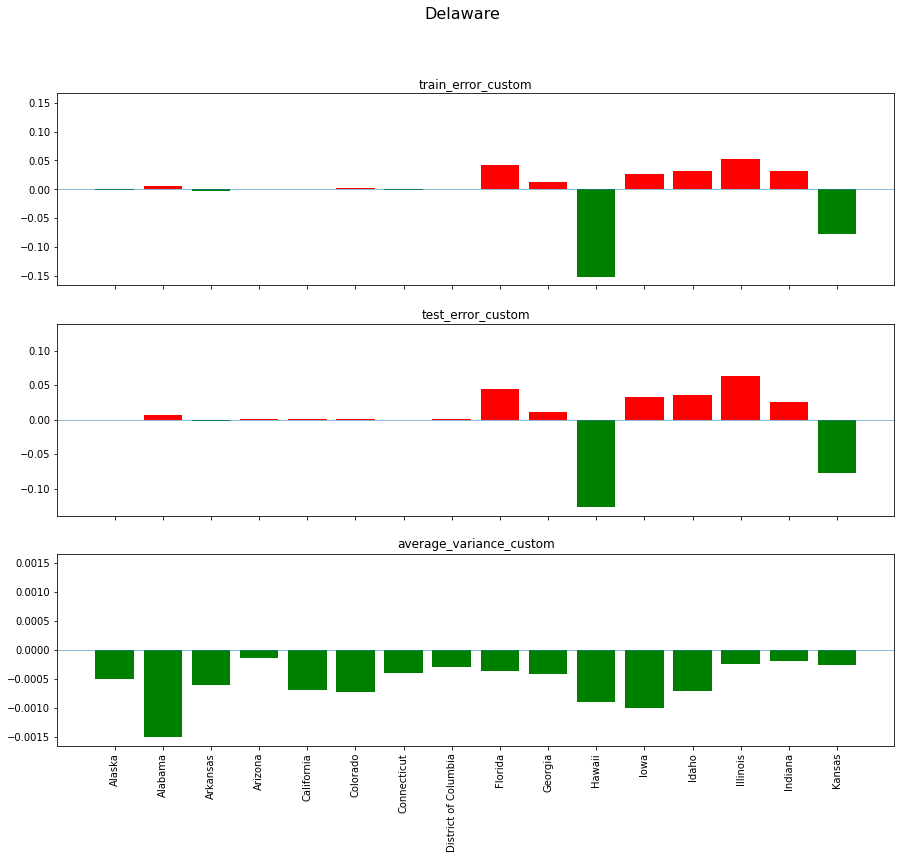

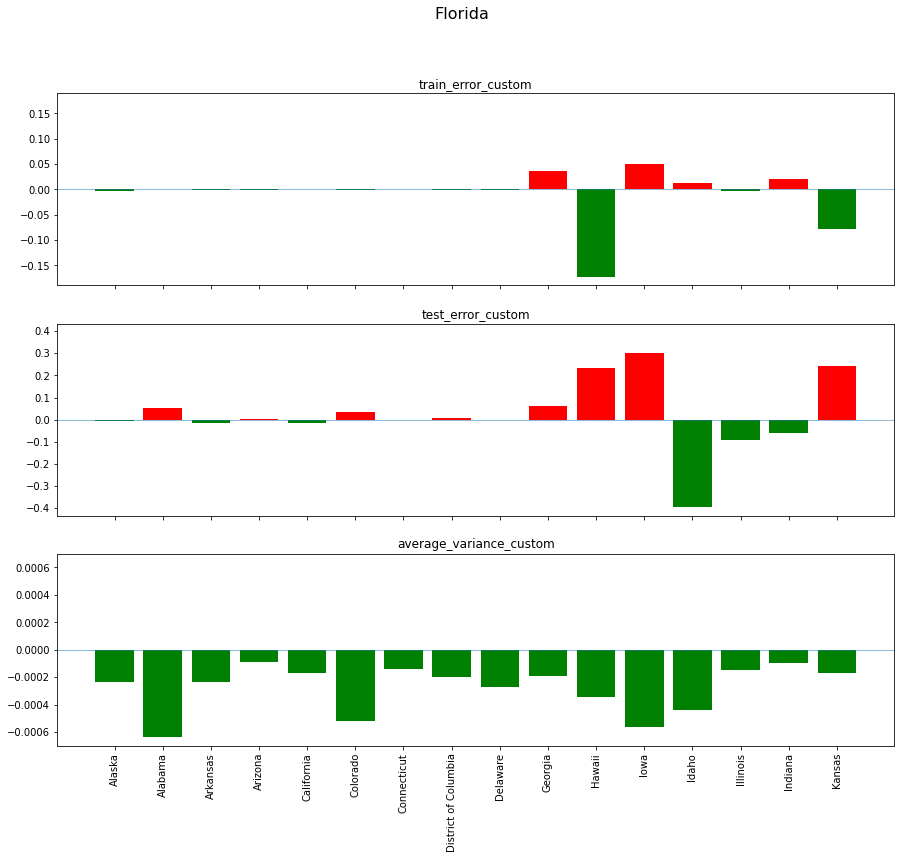

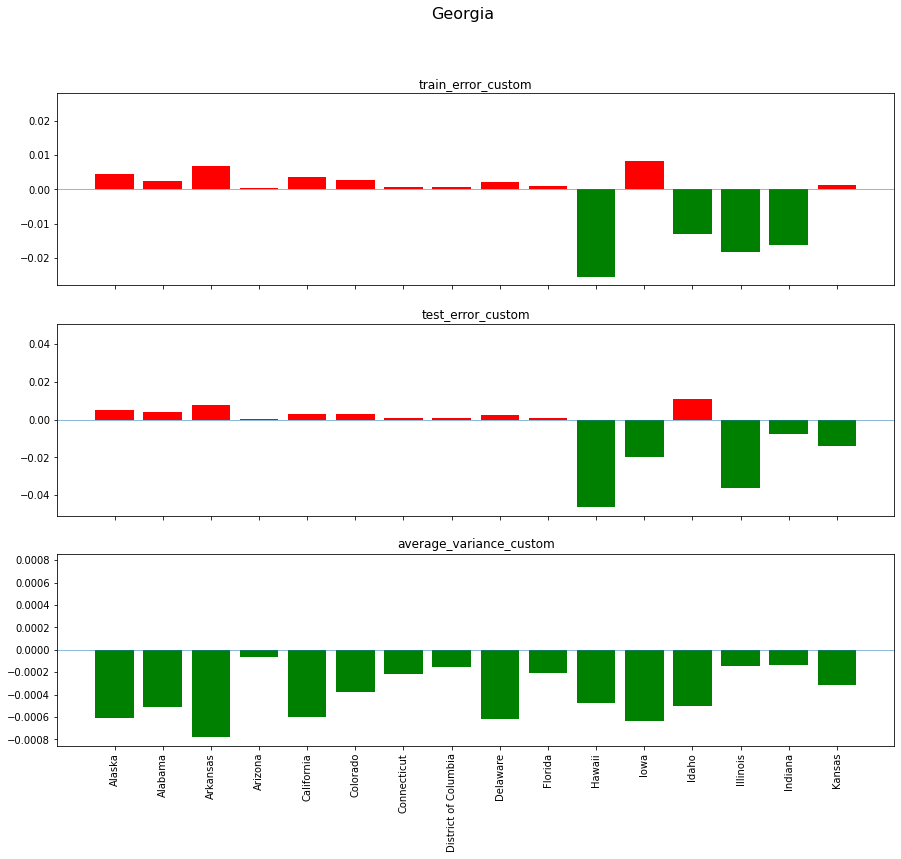

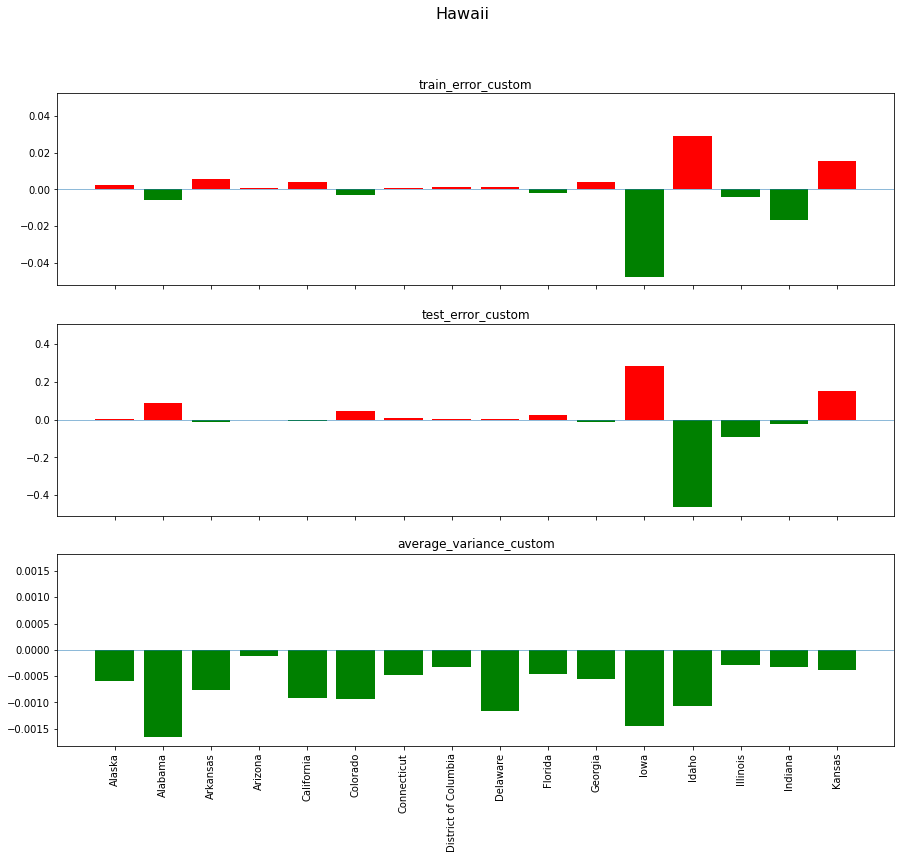

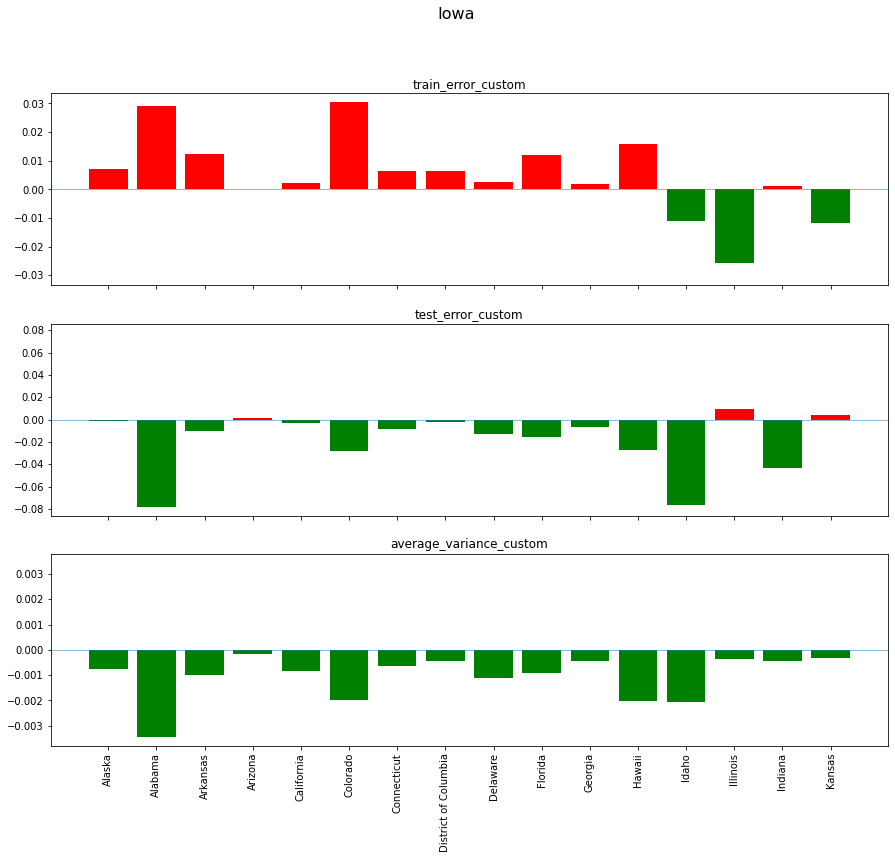

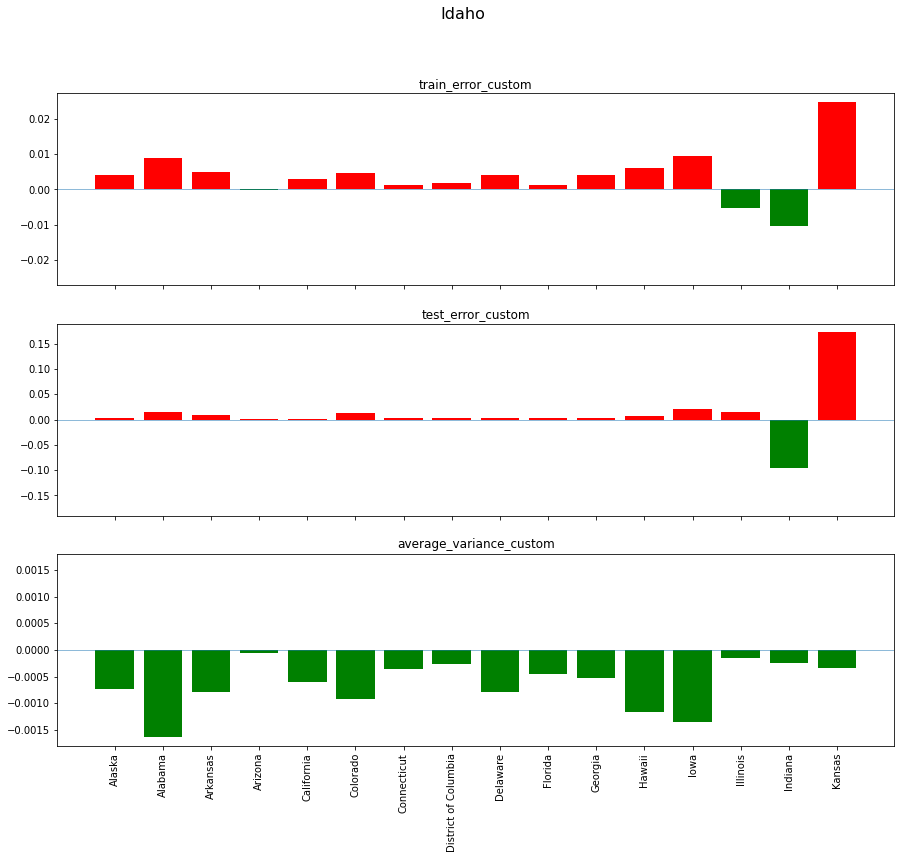

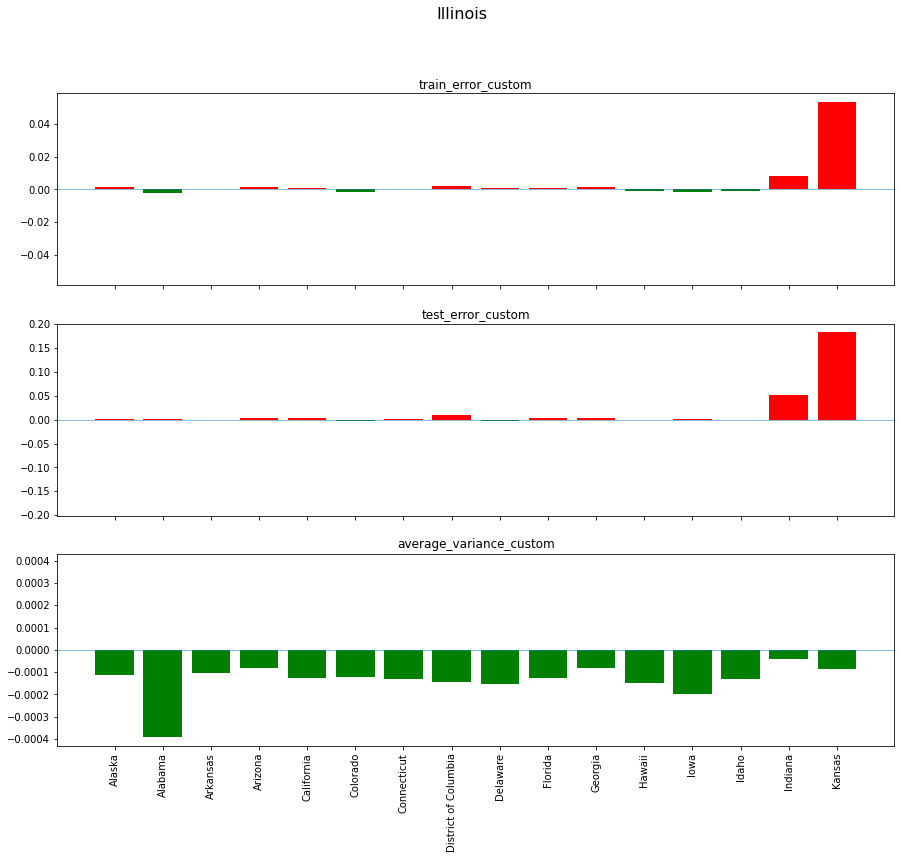

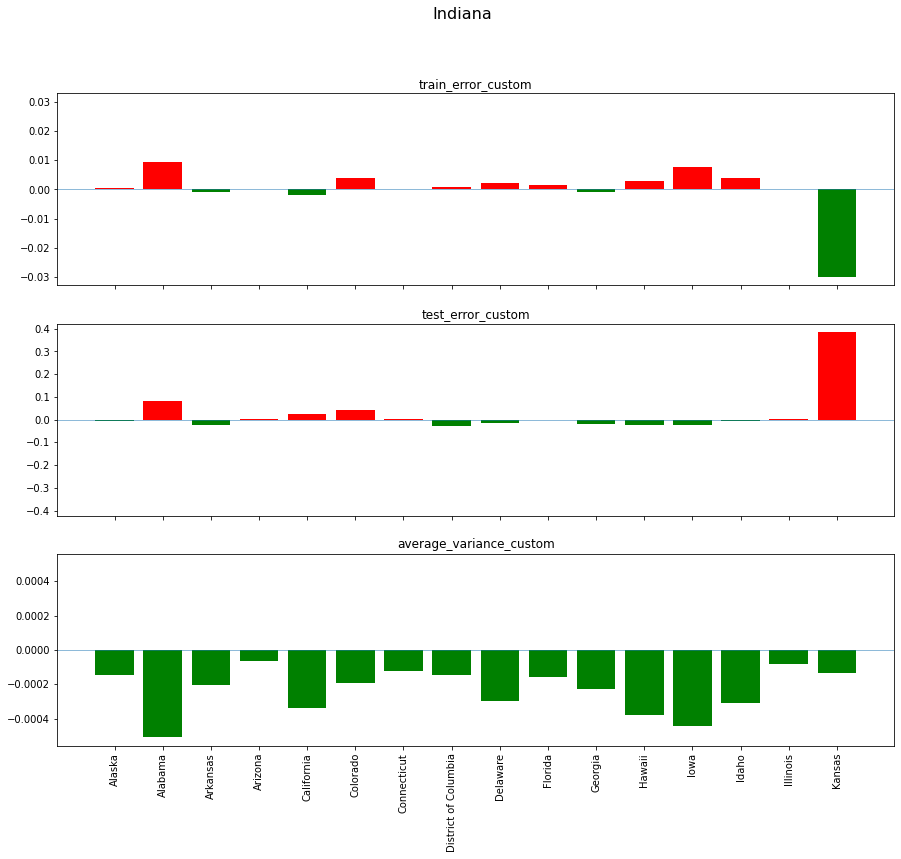

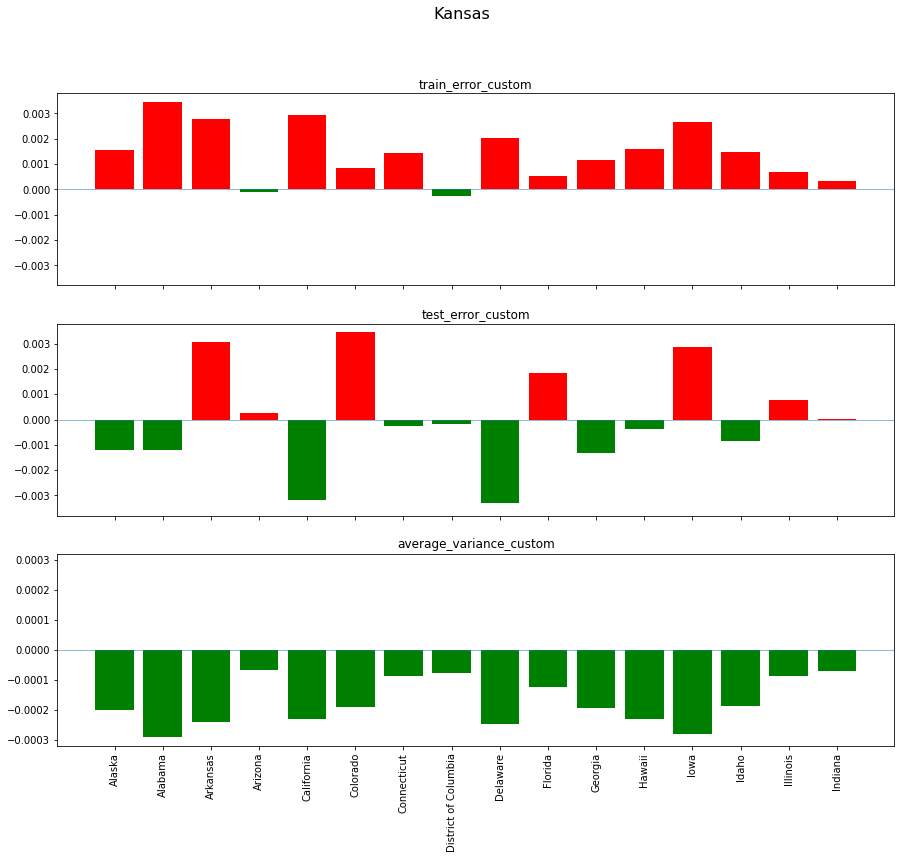

In [7]:
for s in STATES:
    plot_change_for_state(s)

In [8]:
train_error_changes = {(k1, k2): v for k1, kv in changes["train_error_custom"].items() for k2, v in kv.items()}
test_error_changes = {(k1, k2): v for k1, kv in changes["test_error_custom"].items() for k2, v in kv.items()}
avg_variance_changes = {(k1, k2): v for k1, kv in changes["average_variance_custom"].items() for k2, v in kv.items()}

Text(0.5, 1.0, 'train error changes (%)')

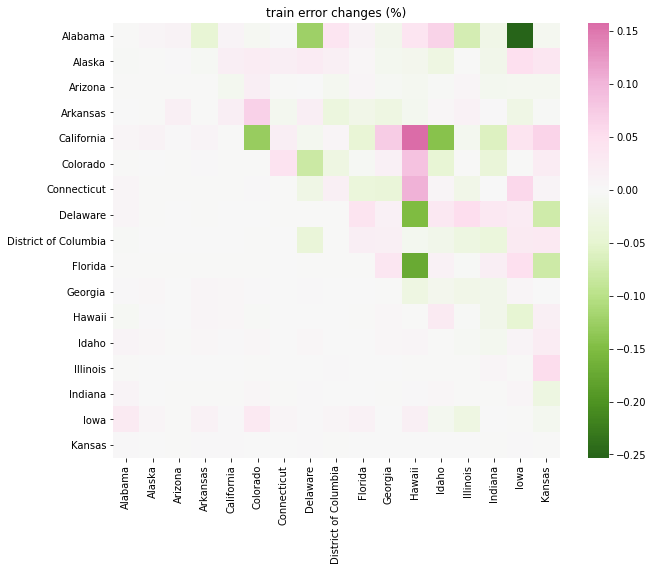

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(train_error_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0,
    ax=ax
)
ax.set_title("train error changes (%)")

Text(0.5, 1.0, 'test error changes (%)')

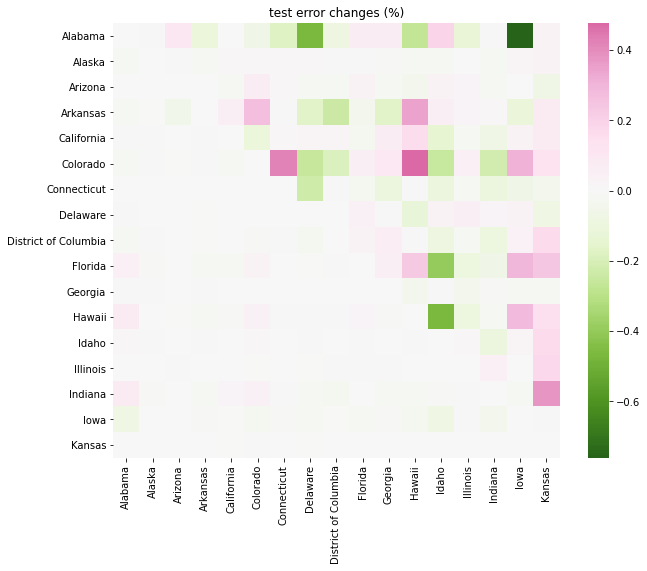

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(test_error_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0
)
ax.set_title("test error changes (%)")

Text(0.5, 1.0, 'average variance changes (%)')

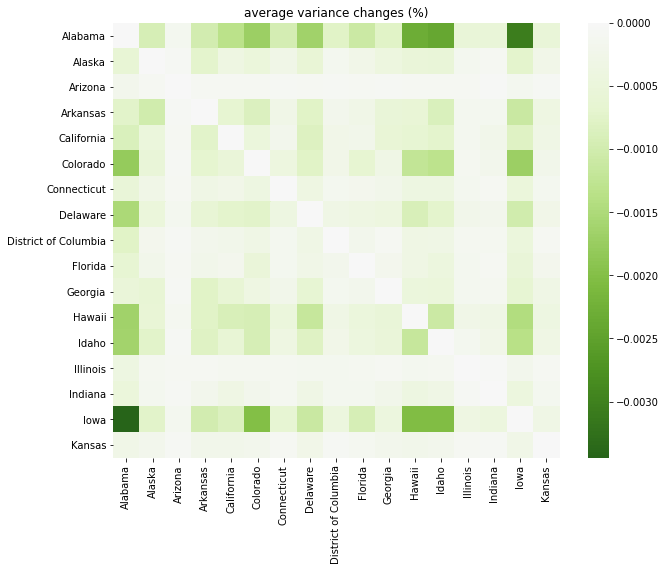

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(avg_variance_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0
)

ax.set_title("average variance changes (%)")